<a href="https://colab.research.google.com/github/PriyankaDhar2/Minor-Projects/blob/main/HandWritten_Digit_Recognition_detailed(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite libraries

In [ ]:
!pip install tensorflow --upgrade --quiet

In [ ]:
!nvidia-smi

Sun Apr 16 05:18:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Libraries import

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# MNIST Digit Recognition

load the dataset and split into train and test part

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

plotting the first image and answer

5


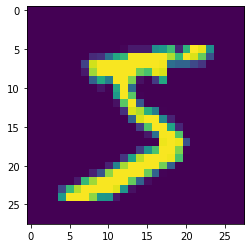

In [ ]:
print(y_train[0])
plt.imshow(X_train[0])
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255

Creating the model

In [ ]:
ANNmodel = keras.models.Sequential([
    keras.layers.Dense(units = 784, activation = 'ReLU', input_shape = (784,)),
    keras.layers.Dense(units = 392, activation = 'ReLU'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 784, activation = 'ReLU'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 10, activation = 'softmax')
], name = "DigitNet")
ANNmodel.compile(
    optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']    
)
ANNmodel.summary()

Model: "DigitNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 392)               307720    
                                                                 
 dropout (Dropout)           (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               308112    
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,239,122
Trainable params: 1,239,122
Non-tr

Checking

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('bestmodel.h5', monitor="val_loss", mode="min", save_best_only=True, verbose = 1)
callbacks = [checkpoint]

In [ ]:
history = ANNmodel.fit(X_train, y_train, batch_size = 100,epochs = 10, validation_data = (X_test, y_test), verbose = 0, callbacks = callbacks)


Epoch 1: val_loss improved from inf to 0.11010, saving model to bestmodel.h5

Epoch 2: val_loss improved from 0.11010 to 0.08186, saving model to bestmodel.h5

Epoch 3: val_loss improved from 0.08186 to 0.07948, saving model to bestmodel.h5

Epoch 4: val_loss did not improve from 0.07948

Epoch 5: val_loss did not improve from 0.07948

Epoch 6: val_loss did not improve from 0.07948

Epoch 7: val_loss improved from 0.07948 to 0.07262, saving model to bestmodel.h5

Epoch 8: val_loss did not improve from 0.07262

Epoch 9: val_loss did not improve from 0.07262

Epoch 10: val_loss did not improve from 0.07262


In [ ]:
ANNmodel = keras.models.load_model('bestmodel.h5')

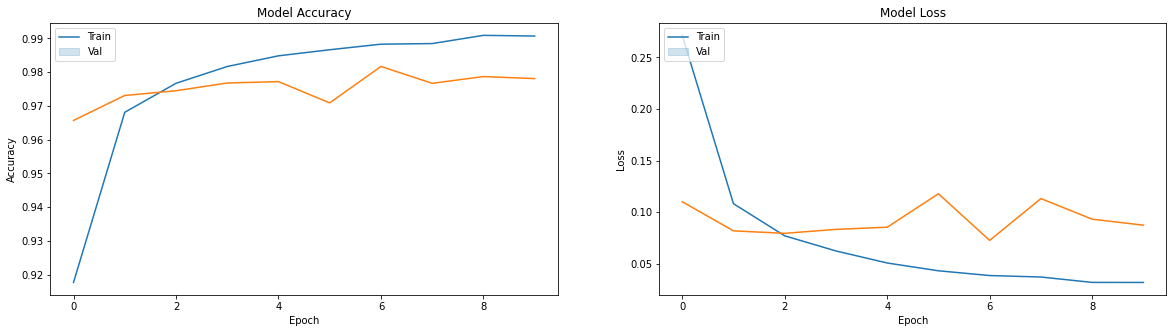

In [ ]:
plt.figure(1,(20,5))
plt.subplot(1, 2, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
sns.lineplot(
    x = range(len(history.history['accuracy'])), 
    y = history.history['accuracy']
)
sns.lineplot(
    x = range(len(history.history['val_accuracy'])), 
    y = history.history['val_accuracy']
)
plt.legend(['Train', 'Val'], loc = 'upper left')

plt.subplot(1, 2, 2)
sns.lineplot(
    x = range(len(history.history['loss'])), 
    y = history.history['loss']
)
sns.lineplot(
    x = range(len(history.history['val_loss'])), 
    y = history.history['val_loss']
)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### User given data testing

In [1]:
!wget https://github.com/PriyankaDhar2/Datasets/raw/main/TestMNISTSelf.zip --quiet
!unzip TestMNISTSelf.zip

Archive:  TestMNISTSelf.zip
 extracting: 0.jpg                   
 extracting: 1.jpg                   
 extracting: 2.jpg                   
 extracting: 3.jpg                   
 extracting: 4.jpg                   
 extracting: 5.jpg                   
 extracting: 6.jpg                   
 extracting: 7.jpg                   
 extracting: 8.jpg                   
 extracting: 9.jpg                   


formatting the images

In [ ]:
from PIL import Image, ImageOps
test_images = []
for i in range(10):
  img = np.asarray(ImageOps.invert(ImageOps.grayscale(Image.open(f'{i}.jpg'))))
  test_images.append(img)

test_images = np.array(test_images)

In [ ]:
test_images[0].reshape(1,-1).shape

(1, 784)

In [ ]:
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
test_images = test_images/255

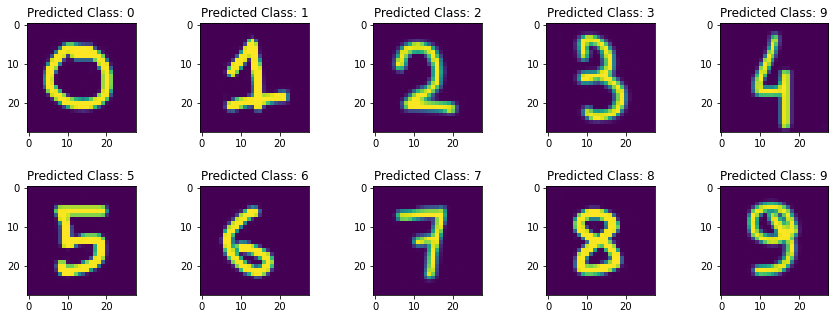

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(test_images[i].reshape(28,28))
    ax[i].title.set_text('Predicted Class: ' + str(np.argmax(ANNmodel.predict(test_images[i].reshape(1,-1),verbose = 0).ravel())))
plt.subplots_adjust(hspace=0.5)
plt.show()